# Homework 04 Anya Sharma
### Pre-lecture

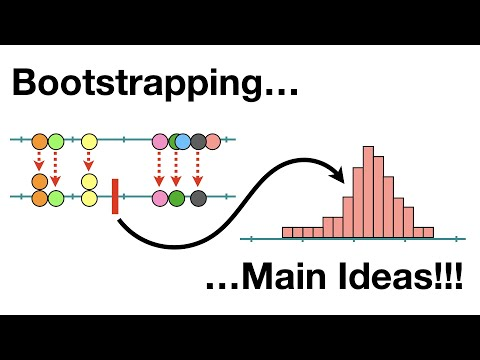

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

## Question 1: 

The standard error of the mean and the standard deviation of the data are different because they represent different values. Standard deviation measures how much the **individual data deviate from the mean value** while standard error of the mean measures how much the **sample size mean differs from the population mean**. The reason it calculates how different the sample size mean value differs from the population mean is because this would show how the mean value may differ if there is a larger sample size. 



## Question 2: 

To find the 95% confidence interval you may use the standard error of means within the calculation. The 95% confidence interval is a section of values between a percentile. This is where the values are most likely to be. This also relates to the standard error of means as in that section, it will have the most amount of values. 
However, these two calculations are different. 
To find the value of the 95% confidence interval, use the standard deviation of the bootstrapped means (also the **standard error of mean from the original data**) and the mean of the bootstrapped means. 

**Equation** = mean +/- (2 * standard error of mean)

This value will then cover 95% of the bootstrapped sample means. 


## Question 3:
To create a 95% bootstrapped confidence interval without using the standard deviation, we can go back to the basic definition of a 95% confidence interval.
To do this, we can use the **percentiles** within the dataset from the 2.5th to 97.5th percentiles using **np.quantile(...)** to show the values. 

Within np.quantile, you can specify which quantile you want to represent. In this case you could say 

**np.quantile(data, 0.025)** to show the 2.5th qunatile and 
**np.quantile(data, 0.0.975)** to show the 97.5th qunatile, then calculate the 95% confidence interval. 

## Question 4:
I worked with the ChatBot to create 2 bootstrapped samples with the means and the standard deviation to create:
1. 95% Confidence interval of the mean
2. 95% Confidence interval of the standard deviation

of the "spending_2021" file of the price of flowers bought. 

In [31]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-05-28/spending_2021.csv"
spending = pd.read_csv(url)

# Choose a numeric column to bootstrap; for example, let's use 'age'
data = spending['price'].dropna()  # Drop NA values
n = len(data)

# Set the number of bootstrap samples
bootstrap_samples = 1000

# Initialize arrays to store bootstrapped statistics
xbar_bootstrapped = np.zeros(bootstrap_samples)
std_bootstrapped = np.zeros(bootstrap_samples)

# Bootstrapping process
for i in range(bootstrap_samples):
    simulated_sample = data.sample(n=n, replace=True)
    xbar_bootstrapped[i] = simulated_sample.mean()
    std_bootstrapped[i] = simulated_sample.std(ddof=1)  # Sample standard deviation

# Calculate 95% confidence intervals using np.quantile
mean_ci = np.quantile(xbar_bootstrapped, [0.025, 0.975])
std_ci = np.quantile(std_bootstrapped, [0.025, 0.975])

print("95% Confidence interval for the mean: ", mean_ci)
print("95% confidence interval for the standard deviation: ", std_ci)

95% Confidence interval for the mean:  [3.05718056 6.61279167]
95% confidence interval for the standard deviation:  [0.30041088 6.52730519]


### ChatBot Log:
Here's a summary of our interaction:

1. **Standard Error and Standard Deviation**:
   - You asked about how to calculate the standard error of the mean and standard deviation, which I explained in detail.
   - We discussed how to create a 95% confidence interval using the standard error of the mean, emphasizing the relationship between bootstrapped sample means and the standard error.

2. **Bootstrapping**:
   - You requested to bootstrap a sample with its standard deviation and create a bootstrapped confidence interval for both the mean and the standard deviation of a specified dataset (villagers data).
   - We developed Python code to perform bootstrapping using the dataset and implemented it in a structured way. 

3. **Data Analysis Code**:
   - You provided a specific code format, which I followed to create two separate bootstrapping processes: one for calculating the mean and another for calculating the standard deviation.
   - The final code utilized the `np.quantile()` function to find the 95% confidence intervals for both statistics and included optional visualization for the bootstrapped distributions.

If you have any more questions or need further assistance, feel free to ask!

### Link to chat: 
https://chatgpt.com/share/66fec6bc-1b00-8002-8727-7105db5ad340

# Post Lecture section. 
## Question 5: 
We need to distinguish between the population parameters and sample statistic when it comes to confidence intervals since the **interval will be different depending on how much data you have**. 
Population parameters include the population mean and population standard deviation which are in **relation to the total population size**. On the other hand, the sample statistics refer to the sample mean and sample population. 
The confidence interval will tend to be smaller when calculated with the population parameters as the amount of data is much larger, while its amount may vary depending on what experiment is done with the sample statistics (values depend on the sample size in this case). 

## Question 6: 
1. Bootstrapping is the process of **estimating a statistic** (like mean or standard deviation) randomly through **sampling with replacement** from a given dataset. Sampling with replacement means that once a sample is chosen from the dataset, you could pick it again (it is replaced back into the data!). 

2. Bootstrapping is done to understand the **sampling distribution of a statistic**, showing **trends if the dataset was larger!** For example if you wanted to understand the standard deviation of a dataset, but you only have a few points, you could bootstrap it and understand how the trends may form for the whole population dataset.

3. Since bootstrapping provides more data points, it can **estimate what the total population averages may look like**. Thus, you could compare your hypothesized average of a population is with the bootstrapped sample size you have to see if you guess may be plausible. 

## Question 7:
We cannot reject the null hypothesis since the confidence interval includes the value 0. Although the sample mean itself is not zero, this is not equal to the confidence interval. 
To understand this better, we should reflect on what the confidence interval is: it is a **interval of values** where the result **may** show. Since it is an interval, and this interval include the value zero, we cannot fully reject the null hypothesis. 
On the other hand, if we wanted to reject the null hypothesis, we should defend this by choosing the sample mean statistic to prove our claim and say that it is not zero. However since we decided on using the confidence interval, we cannot completely reject this claim. 

### ChatBot Log:
Here's a summary of our interaction:

Population Parameters vs. Sample Statistics: We discussed the relative roles of population parameters (fixed values summarizing entire populations) and sample statistics (variable values summarizing samples), highlighting their importance in statistical inference and estimation.

If there's anything specific you'd like to add or modify, let me know!

### Link:
https://chatgpt.com/share/66fecbdf-0a44-8002-ba5e-26b904294039


## Question 8:

### Vaccine Analysis Assignment:

## Problem Introduction:
A Null Hypothesis of "no effect" in this context is that the improvement in health scores of the patients after using the vaccine stays the same. 

### Initial Data Visualization. 
This shows the initial visualization of how the intial health scores and final health scores compare through a simple bar plot and a histogram.  
Due to having less data, there seems to be a trend between the intial health scores improving to a higher number after using the vaccine. We can see this as the health scores increase after using the vaccine. However, since the sample size is small, this trend may change as we bootstrap the data. 

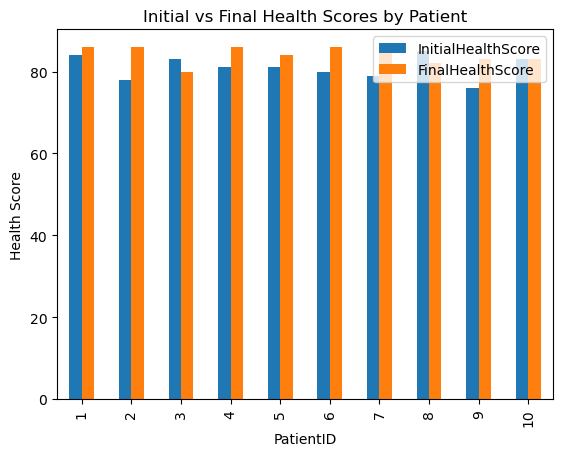

In [42]:
import matplotlib.pyplot as plt # import matplot.lib

# Sample data loaded from personal github
url = "https://raw.githubusercontent.com/Anya-sharma/STA130/refs/heads/main/DATA.csv"
df = pd.read_csv(url) # read csv file 

# Simple bar plot comparing the trend seen. 
df.plot(x='PatientID', y=['InitialHealthScore', 'FinalHealthScore'], kind='bar')
plt.ylabel('Health Score') # name the y-axis
plt.title('Initial vs Final Health Scores by Patient') # name of the title of the bar graph
plt.show() #show the plot


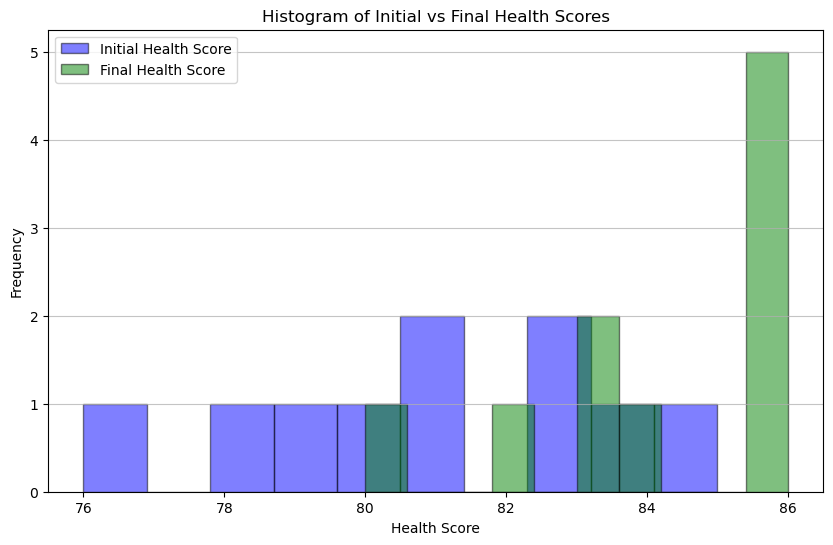

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data loaded from personal github
url = "https://raw.githubusercontent.com/Anya-sharma/STA130/refs/heads/main/DATA.csv"
df = pd.read_csv(url) # read csv file 

# Plot histograms
#here are a bunch of ways to ensure the plot has the correct values 
plt.figure(figsize=(10, 6))
plt.hist(df['InitialHealthScore'], bins=10, alpha=0.5, label='Initial Health Score', color='blue', edgecolor='black')
plt.hist(df['FinalHealthScore'], bins=10, alpha=0.5, label='Final Health Score', color='green', edgecolor='black')
plt.title('Histogram of Initial vs Final Health Scores')
plt.xlabel('Health Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()


## Quantitative Analysis:
Here I create a quantatative analysis of the data, bootstrapping it and then calculating the initial and final confidence intervals. 

I did this through these steps to understand the **mean** to see if creating a larger sample size will indeed improve health (seeing if I can reject the null hypothesis)
1. I loaded the csv file as a url. 
2. I set a random seed and a number of bootstrapped samples
3. Bootstrapped the initial health mean and the final health mean
4. Found the confidence interval for these 2 values
5. Created histograms of these values and visualized them. 


Results of the first section:
- I was able to see that the confidence interval of the **final mean is larger** then the **inital mean**. Additionally, the histogram of the bootstrapped means showed the same conclusion. 

In [51]:
import pandas as pd #import libraries 
import numpy as np

# Sample data loaded from personal github
url = "https://raw.githubusercontent.com/Anya-sharma/STA130/refs/heads/main/DATA.csv"
df = pd.read_csv(url) # read the url

# Set the random seed 
np.random.seed(42)

# Set the number of bootstrap samples
bootstrap_samples = 1000

# Initialize arrays to store bootstrapped statistics
initial_mean_bootstrapped = np.zeros(bootstrap_samples)
final_mean_bootstrapped = np.zeros(bootstrap_samples)

# Bootstrapping process for InitialHealthScore
for i in range(bootstrap_samples):
    simulated_sample_initial = df['InitialHealthScore'].sample(n=len(df), replace=True)
    initial_mean_bootstrapped[i] = simulated_sample_initial.mean()

# Bootstrapping process for FinalHealthScore
for i in range(bootstrap_samples):
    simulated_sample_final = df['FinalHealthScore'].sample(n=len(df), replace=True)
    final_mean_bootstrapped[i] = simulated_sample_final.mean()

# Calculate 95% confidence intervals
initial_mean_ci = np.quantile(initial_mean_bootstrapped, [0.025, 0.975])
final_mean_ci = np.quantile(final_mean_bootstrapped, [0.025, 0.975])

#print out the statistics to show the bootstrapped means. 
print("Bootstrapped 95% Confidence Intervals of Means:")
print("Initial Mean:", initial_mean_ci)
print("Final Mean:", final_mean_ci)


Bootstrapped 95% Confidence Intervals of Means:
Initial Mean: [79.2    82.6025]
Final Mean: [82.9 85.3]


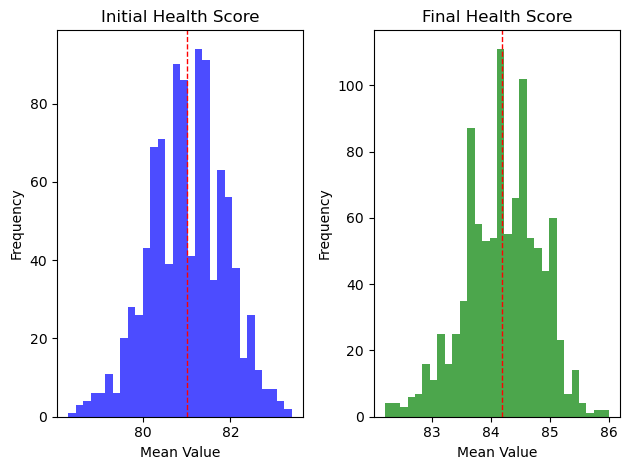

In [52]:
# Histogram for Initial Health Score
plt.subplot(1, 2, 1)
plt.hist(initial_mean_bootstrapped, bins=30, color='blue', alpha=0.7)
plt.axvline(np.mean(initial_mean_bootstrapped), color='red', linestyle='dashed', linewidth=1)
plt.title('Initial Health Score') #changed the name then the one provided by ChatBot
plt.xlabel('Mean Value')
plt.ylabel('Frequency')

# Histogram for Final Health Score
plt.subplot(1, 2, 2)
plt.hist(final_mean_bootstrapped, bins=30, color='green', alpha=0.7)
plt.axvline(np.mean(final_mean_bootstrapped), color='red', linestyle='dashed', linewidth=1)
plt.title('Final Health Score')#changed the name then the one provided by ChatBot
plt.xlabel('Mean Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Findings and Discussion

Results of the null hypothesis:
- I believe that we can reject the null hypothesis since the bootstrapped mean value created is different between the initial health score and final health Scores. This proves that with a larger sample size, the vaccine is estimated to improve the health of patients. 

Further Considerations:
- However, if the sample size was larger, I believe there would be more variation betweent the two sample means. This would include the fact that many humans are very different from each other. Vaccines do not affect humans the same way and they would be outliers. 
- For this company, I would suggest doing more tests, however the bootstrapped sample gives an estimate for their team on the effectiveness of this vaccine. 


### ChatBot Log: 
In our interaction, we discussed bootstrapping a dataset containing health scores. You provided sample data and requested visualizations and analyses. We created histograms comparing `InitialHealthScore` and `FinalHealthScore`, performed bootstrapping to estimate means and confidence intervals, and used a paired t-test to analyze changes. Additionally, we ensured reproducibility by setting a random seed. If you need any further assistance or clarifications, feel free to ask!

### ChatBot Link: https://chatgpt.com/share/66fed54c-6d08-8006-acba-92c48b151fcf

## Question 9:
Yes. I have used the discussion board. 
